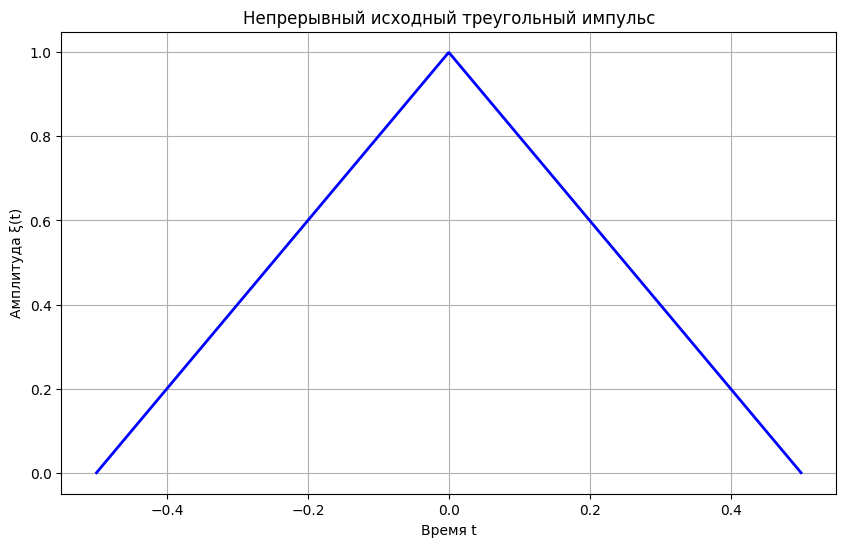

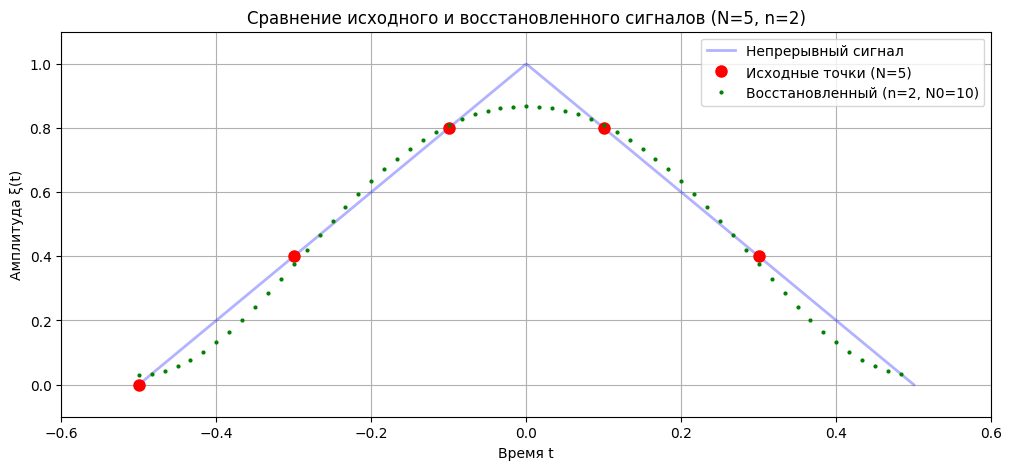

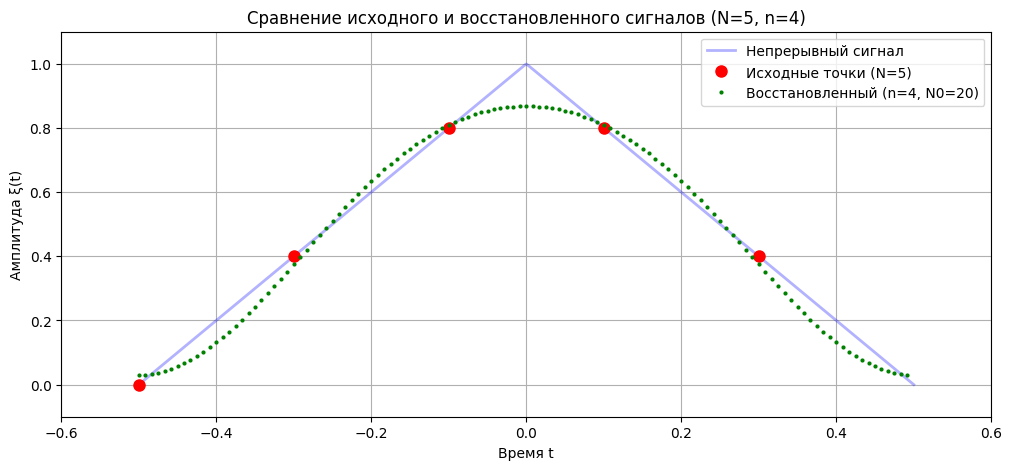

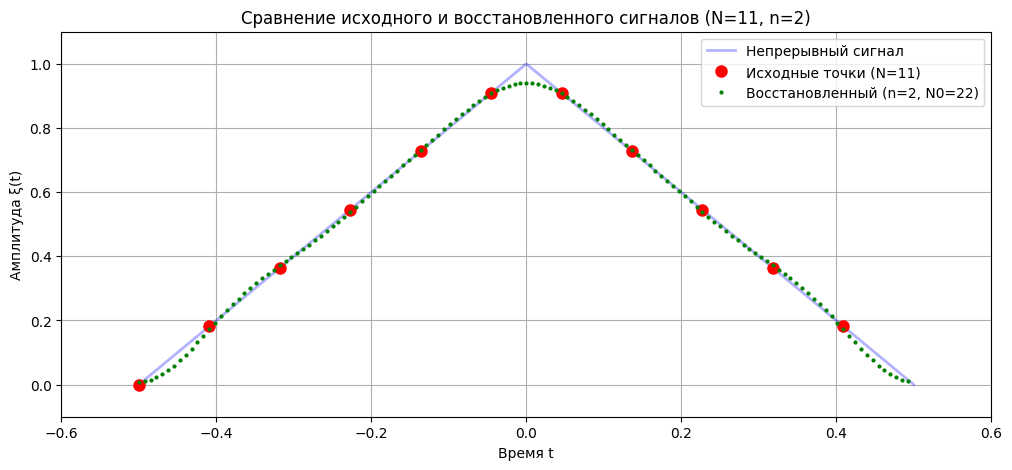

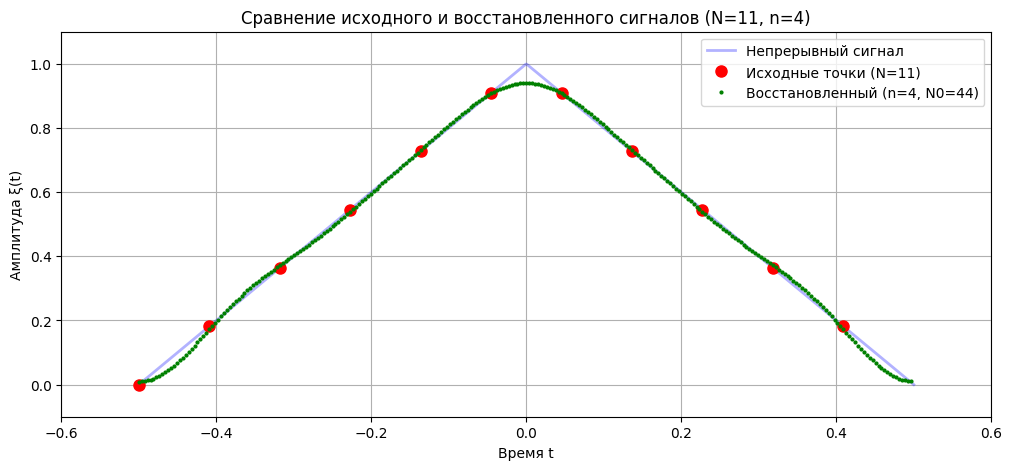

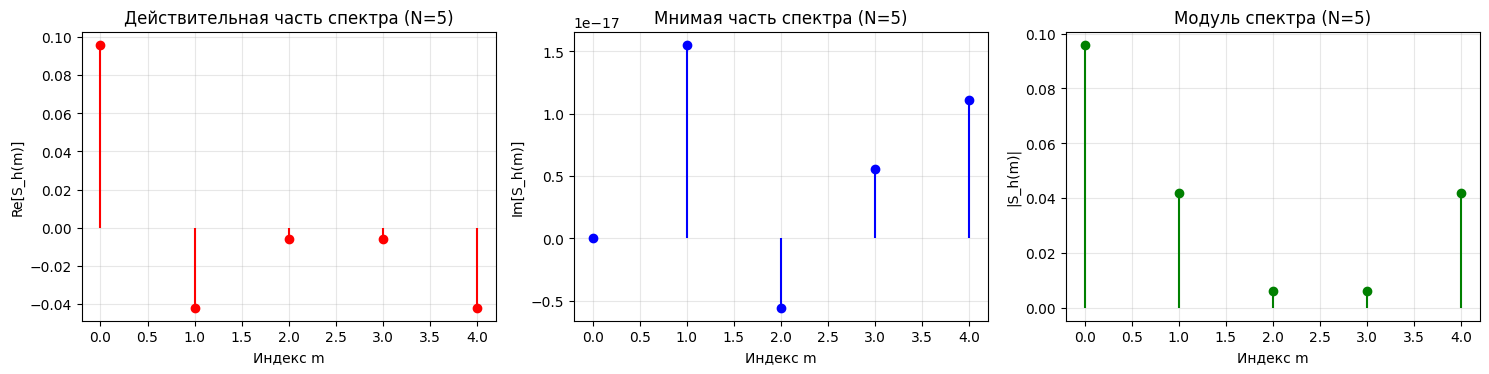

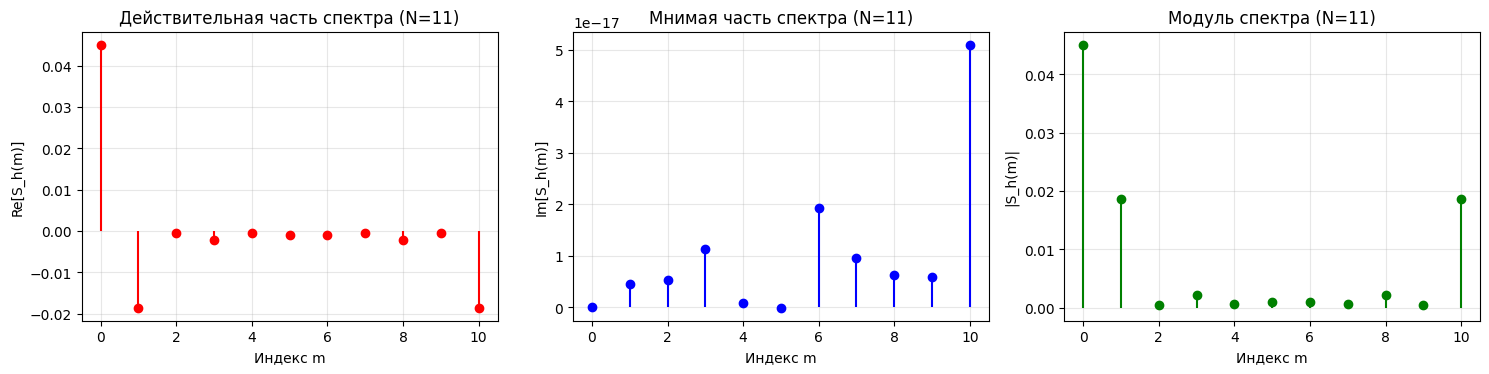

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
a = 1
tau = 1
N_values = [5, 11]
n_values = [2, 4]

# 1. Непрерывный исходный сигнал
def continuous_triangular_signal(t, a=1, tau=1):
    """Аналитический треугольный импульс"""
    return np.where(np.abs(t) <= tau/2,
                   a * (1 - 2*np.abs(t)/tau),
                   0)

# Создаем непрерывный сигнал для отображения
t_continuous = np.linspace(-tau/2, tau/2, 1000)
xi_continuous = continuous_triangular_signal(t_continuous, a, tau)

plt.figure(figsize=(10, 6))
plt.plot(t_continuous, xi_continuous, 'b-', linewidth=2)
plt.title('Непрерывный исходный треугольный импульс')
plt.xlabel('Время t')
plt.ylabel('Амплитуда ξ(t)')
plt.grid(True)
plt.show()

# 2. Функции для вычисления по исправленным формулам
def compute_discrete_signal(N, a=1, tau=1):
    """Вычисление дискретного сигнала"""
    t_discrete = np.linspace(-tau/2, tau/2, N, endpoint=False)
    xi_discrete = continuous_triangular_signal(t_discrete, a, tau)
    return t_discrete, xi_discrete

def compute_spectrum(xi_discrete, N, a=1, tau=1):
    """Вычисление спектра по исправленной формуле"""
    S_h = np.zeros(N, dtype=complex)
    h = tau / N  # шаг дискретизации

    for m in range(N):
        sum_val = 0
        for j in range(N):
            # Исправлено: используем exp(+i) согласно конвенции учебника
            sum_val += xi_discrete[j] * np.exp(1j * 2 * np.pi * m * j / N)
        S_h[m] = (h / N) * sum_val
    return S_h

def reconstruct_signal(S_h, n, N, tau=1):
    """Восстановление сигнала по исправленной формуле"""

    h = tau / N  # исходный шаг дискретизации
    N0 = 6 * n * N  # Количество точек восстановленного сигнала

    # Дополнение спектра нулями (симметричное)
    S_padded = np.zeros(N0, dtype=complex)
    S_padded[:N//2] = S_h[:N//2]
    S_padded[N0 - N//2:] = S_h[N - N//2:]

    # Обратное преобразование Фурье с правильным масштабированием
    xi_reconstructed = np.zeros(N0, dtype=complex)
    for k in range(N0):
        sum_val = 0
        for m in range(N0):
            # Исправлено: используем exp(-i) для обратного преобразования
            sum_val += S_padded[m] * np.exp(-1j * 2 * np.pi * m * k / N0)
        xi_reconstructed[k] = (1 / h) * sum_val

    t_reconstructed = np.linspace(-tau/2, tau/2, N0, endpoint=False)
    return t_reconstructed, xi_reconstructed.real

# 3. Построение графиков для всех случаев
for N in N_values:
    for n in n_values:
        # Вычисляем исходный дискретный сигнал
        t_discrete, xi_discrete = compute_discrete_signal(N, a, tau)

        # Вычисляем спектр
        S_h = compute_spectrum(xi_discrete, N, a, tau)

        # Восстанавливаем сигнал
        t_reconstructed, xi_reconstructed = reconstruct_signal(S_h, n, N, tau)

        # Строим график
        plt.figure(figsize=(12, 5))

        # Непрерывный сигнал для сравнения
        plt.plot(t_continuous, xi_continuous, 'b-', alpha=0.3, linewidth=2, label='Непрерывный сигнал')

        # Исходные дискретные точки - ТОЧКИ
        plt.plot(t_discrete, xi_discrete, 'ro', markersize=8, label=f'Исходные точки (N={N})')

        # Восстановленные дискретные точки - ТОЧКИ
        plt.plot(t_reconstructed, xi_reconstructed, 'g.', markersize=4, label=f'Восстановленный (n={n}, N0={n*N})')

        plt.title(f'Сравнение исходного и восстановленного сигналов (N={N}, n={n})')
        plt.xlabel('Время t')
        plt.ylabel('Амплитуда ξ(t)')
        plt.legend()
        plt.grid(True)
        plt.xlim(-0.6, 0.6)
        plt.ylim(-0.1, 1.1)
        plt.show()

# 4. Дополнительно: графики спектров с большим количеством точек
for N in N_values:
    t_discrete, xi_discrete = compute_discrete_signal(N, a, tau)
    S_h = compute_spectrum(xi_discrete, N, a, tau)

    plt.figure(figsize=(15, 4))

    plt.subplot(1, 3, 1)
    plt.stem(np.arange(N), S_h.real, linefmt='r-', markerfmt='ro', basefmt=" ")
    plt.title(f'Действительная часть спектра (N={N})')
    plt.xlabel('Индекс m')
    plt.ylabel('Re[S_h(m)]')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 2)
    plt.stem(np.arange(N), S_h.imag, linefmt='b-', markerfmt='bo', basefmt=" ")
    plt.title(f'Мнимая часть спектра (N={N})')
    plt.xlabel('Индекс m')
    plt.ylabel('Im[S_h(m)]')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 3)
    plt.stem(np.arange(N), np.abs(S_h), linefmt='g-', markerfmt='go', basefmt=" ")
    plt.title(f'Модуль спектра (N={N})')
    plt.xlabel('Индекс m')
    plt.ylabel('|S_h(m)|')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()